## Chloe's Explore Notebook for the NLP Group Project

### Imports

In [1]:
import pandas as pd
import numpy as np

# Scraping
import requests
from bs4 import BeautifulSoup

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import nltk.sentiment

from wordcloud import WordCloud

# Regex
import re

# Time
from time import strftime

import unicodedata
import json
from pprint import pprint

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Custom Imports
import acquire 
from prepare import *

# Turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# pd.set_option('display.max_colwidth', -1)

### Acquire

In [2]:
# acquire.scrape_github_data()

In [3]:
# df = pd.DataFrame(acquire.scrape_github_data(),columns=['repo','language','readme_contents'])
# df.head()


In [4]:
df = pd.read_json('repo_readmes.json')

In [5]:
df.shape

(960, 3)

In [6]:
original = pd.read_json('repo_readmes.json')
print(original)

                              repo    language  \
0                  bitcoin/bitcoin         C++   
1          bitcoinbook/bitcoinbook    AsciiDoc   
2                bitcoinj/bitcoinj        Java   
3                     bitcoin/bips    Wikitext   
4          bitcoinjs/bitcoinjs-lib  TypeScript   
..                             ...         ...   
955              spesmilo/electrum      Python   
956  bitcoin-wallet/bitcoin-wallet        Java   
957        etotheipi/BitcoinArmory         C++   
958    bitcoin-dot-org/Bitcoin.org        HTML   
959               jgarzik/cpuminer           C   

                                       readme_contents  
0    Bitcoin Core integration/staging tree\n=======...  
1    Code Examples: ![travis_ci](https://travis-ci....  
2    [![Github Build Status](https://github.com/bit...  
3    People wishing to submit BIPs, first should pr...  
4    # BitcoinJS (bitcoinjs-lib)\n[![Github CI](htt...  
..                                                 ...  


### Prepare

In [7]:
df.head()

,repo,language,readme_contents
0,bitcoin/bitcoin,C++,Bitcoin Core integration/staging tree\n=======...
1,bitcoinbook/bitcoinbook,AsciiDoc,Code Examples: ![travis_ci](https://travis-ci....
2,bitcoinj/bitcoinj,Java,[![Github Build Status](https://github.com/bit...
3,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
4,bitcoinjs/bitcoinjs-lib,TypeScript,# BitcoinJS (bitcoinjs-lib)\n[![Github CI](htt...


In [8]:
# if you want to see the whole column contents:
# pd.set_option('display.max_colwidth', -1)

In [9]:
# how many language observations do we have?

df.language.value_counts(normalize = True)

Java          0.2
C++           0.2
Wikitext      0.1
AsciiDoc      0.1
Python        0.1
HTML          0.1
TypeScript    0.1
C             0.1
Name: language, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 959
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             960 non-null    object
 1   language         960 non-null    object
 2   readme_contents  960 non-null    object
dtypes: object(3)
memory usage: 30.0+ KB


Split data since we will be modeling. 

In [11]:
# SPLIT
from sklearn.model_selection import train_test_split
# Test set is .2 of original dataframe
train, test = train_test_split(df, test_size = .2, random_state=123, stratify= df.language)
# The remainder is here divided .7 to train and .3 to validate
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify= train.language)
train.shape, validate.shape, test.shape

((537, 3), (231, 3), (192, 3))

In [12]:
# how many language observations do we have?

train.language.value_counts(normalize = True)

Java          0.199255
C++           0.199255
AsciiDoc      0.100559
Python        0.100559
HTML          0.100559
TypeScript    0.100559
C             0.100559
Wikitext      0.098696
Name: language, dtype: float64

In [99]:
# remove_stopwords(str(train.readme_contents))

In [13]:
# combine all contents in single string by language

java_words = basic_clean(' '.join(train[train.language == 'Java'].readme_contents))
c_plus_plus__words = basic_clean(' '.join(train[train.language == 'C++'].readme_contents))
wiki_words = basic_clean(' '.join(train[train.language == 'Wikitext'].readme_contents))
type_words = basic_clean(' '.join(train[train.language == 'TypeScript'].readme_contents))
c_words = basic_clean(' '.join(train[train.language == 'C'].readme_contents))
ascii_words = basic_clean(' '.join(train[train.language == 'AsciiDoc'].readme_contents))
python_words = basic_clean(' '.join(train[train.language == 'Python'].readme_contents))
html_words = basic_clean(' '.join(train[train.language == 'HTML'].readme_contents))
all_words = basic_clean(' '.join(train.readme_contents))

In [14]:
# all_words

In [110]:
java_words = remove_stopwords(str(java_words))

In [109]:
c_plus_plus__words = remove_stopwords(str(c_plus_plus__words))

In [108]:
wiki_words = remove_stopwords(str(wiki_words))

In [106]:
type_words = remove_stopwords(str(type_words))

In [111]:
c_words = remove_stopwords(str(c_words))

In [112]:
ascii_words = remove_stopwords(str(ascii_words))

In [113]:
python_words = remove_stopwords(str(python_words))

In [114]:
html_words = remove_stopwords(str(html_words))

In [115]:
all_words = remove_stopwords(str(all_words))

### Explore

In [116]:
# represent contents as word frequencies

java_freq = pd.Series(java_words.split()).value_counts()
c_plus_plus_freq = pd.Series(c_plus_plus__words.split()).value_counts()
wiki_freq = pd.Series(wiki_words.split()).value_counts()
type_freq = pd.Series(type_words.split()).value_counts()
c_freq = pd.Series(c_words.split()).value_counts()
ascii_freq = pd.Series(ascii_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
html_freq = pd.Series(html_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [117]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([java_freq, c_plus_plus_freq, wiki_freq, type_freq, c_freq, ascii_freq, python_freq, html_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['java', 'c_plus_plus', 'wiki', 'typescript', 'c', 'asciidoc', 'python', 'html', 'all']
word_counts.head()

,java,c_plus_plus,wiki,typescript,c,asciidoc,python,html,all
gradle,743,0,0,0,0,0,0,0,743
build,682,104,0,54,108,0,108,108,1164
use,575,107,106,540,0,108,54,0,1490
wallet,474,0,0,0,0,0,54,0,528
app,437,0,0,0,0,0,0,0,437


In [118]:
java_freq

gradle        743
build         682
use           575
wallet        474
app           437
             ... 
run            52
equivalent     52
currently      52
hardware       52
created        52
Length: 261, dtype: int64

- What are the most frequently occuring words? 

- Are there words that uniquely identify with a certain language's repos? 


In [119]:
# most frequently occuring words: sort by 'all'

word_counts.sort_values('all', ascending=False).head(20)

,java,c_plus_plus,wiki,typescript,c,asciidoc,python,html,all
standard,0,0,6466,0,0,0,0,0,6466
stylebackgroundcolor,0,0,5300,0,0,0,0,0,5300
applications,52,0,3339,0,0,0,0,0,3391
bitcoin,376,657,371,324,54,972,54,108,2916
consensus,0,0,2703,0,0,0,0,0,2703
draft,0,0,2650,0,0,0,0,0,2650
fork,0,55,2438,0,0,0,0,0,2493
cfffcf,0,0,2279,0,0,0,0,0,2279
ffcfcf,0,0,2226,0,0,0,0,0,2226
final,0,0,2226,0,0,0,0,0,2226


In [171]:
# requently occuring words by language: sort by language
word_counts_sorted = word_counts.sort_values(['java', 'c_plus_plus', 'wiki', 'typescript', 'c', 'asciidoc', 'python', 'html'], ascending=[True, True, True, True, True, True, True, True]).sample(20)

In [172]:
word_counts_sorted

,java,c_plus_plus,wiki,typescript,c,asciidoc,python,html,all
sending,0,0,0,54,0,0,0,0,54
sigop,0,0,106,0,0,0,0,0,106
multithreaded,0,0,0,0,54,0,0,0,54
httpschartgoogleapiscomchartchs250x250chtqrchlbitcoin1armoryxcfq7tncsuza9fqjrywj4bkrkfvlabelarmorydonation,0,52,0,0,0,0,0,0,52
httpwwwriverbankcomputingcouksoftwarepyqtdownload,0,52,0,0,0,0,0,0,52
audit,0,0,0,108,0,0,0,0,108
youve,0,0,0,0,0,0,54,0,54
external,0,0,0,162,0,0,0,0,162
alternatives,0,0,0,54,0,0,0,0,54
takes,0,0,0,54,0,0,0,0,54


- least common and most common words for each language. 

In [143]:
java_freq.idxmin(), java_freq.idxmax()

('tools', 'gradle')

In [142]:
c_plus_plus_freq.idxmin(), c_plus_plus_freq.idxmax()

('us', 'windows')

In [141]:
wiki_freq.idxmin(), wiki_freq.idxmax()

('miller', 'standard')

In [140]:
type_freq.idxmin(), type_freq.idxmax()

('active', 'create')

In [139]:
c_freq.idxmin(), c_freq.idxmax()

('faqs', 'instructions')

In [138]:
ascii_freq.idxmin(), ascii_freq.idxmax()

('new', 'bitcoin')

In [137]:
python_freq.idxmin(), python_freq.idxmax()

('happens', 'install')

In [136]:
html_freq.idxmin(), html_freq.idxmax()

('value', 'adding')

In [135]:
all_freq.idxmin(), all_freq.idxmax()

('line', 'standard')

- python vs Java for 20 most common words

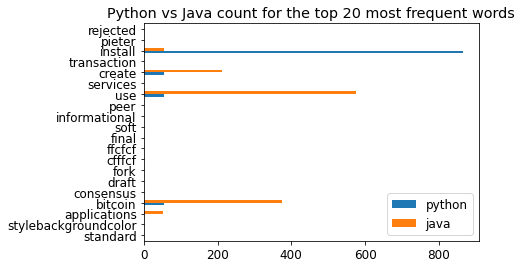

In [144]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['python', 'java']].plot.barh()
plt.title('Python vs Java count for the top 20 most frequent words');

- C++ vs Java for 20 most common words

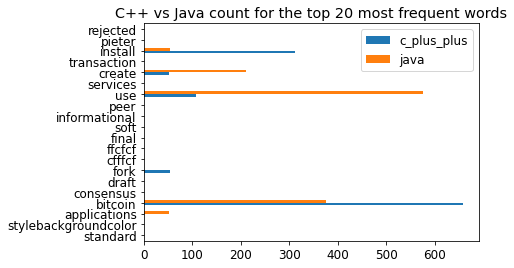

In [145]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['c_plus_plus', 'java']].plot.barh()
plt.title('C++ vs Java count for the top 20 most frequent words');

- Wikitext vs Java for 20 most common words

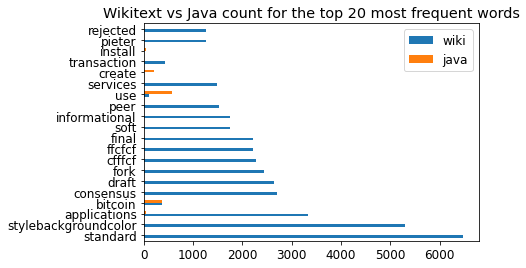

In [146]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['wiki', 'java']].plot.barh()
plt.title('Wikitext vs Java count for the top 20 most frequent words');

- Wikitext vs TypeScript for 20 most common words

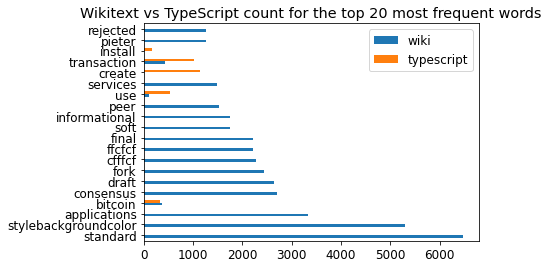

In [147]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['wiki', 'typescript']].plot.barh()
plt.title('Wikitext vs TypeScript count for the top 20 most frequent words');

- Wikitext vs C for 20 most common words

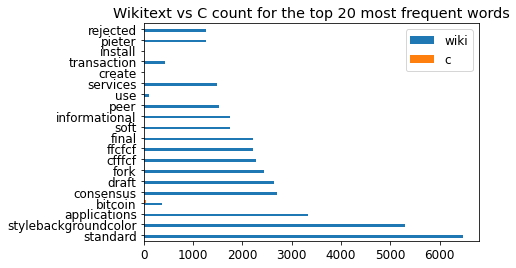

In [148]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['wiki', 'c']].plot.barh()
plt.title('Wikitext vs C count for the top 20 most frequent words');

- Wikitext vs AsciiDoc for 20 most common words

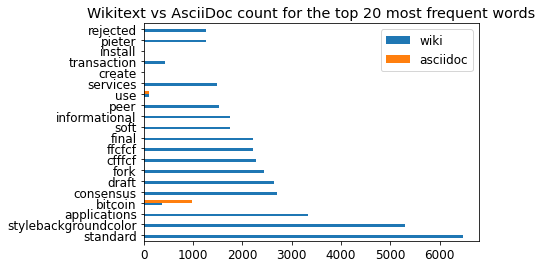

In [149]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['wiki', 'asciidoc']].plot.barh()
plt.title('Wikitext vs AsciiDoc count for the top 20 most frequent words');

- Wikitext vs HTML for 20 most common words

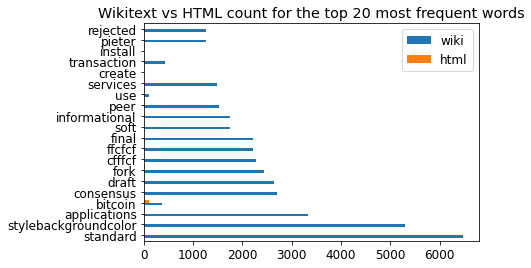

In [150]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['wiki', 'html']].plot.barh()
plt.title('Wikitext vs HTML count for the top 20 most frequent words');

- % of Wikitext vs all for 20 most common words

<Figure size 864x432 with 0 Axes>

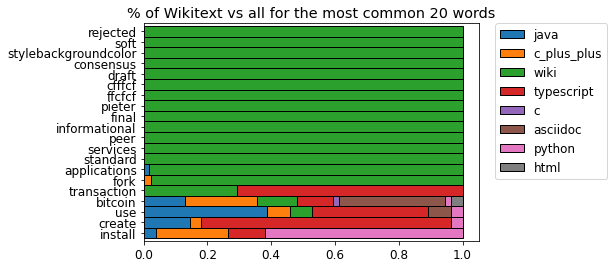

In [151]:
plt.figure(figsize=(12, 6))

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'wiki')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of Wikitext vs all for the most common 20 words')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

- exploring n-grams
    - what are the most common bigrams? 
    - most common bigrams by language

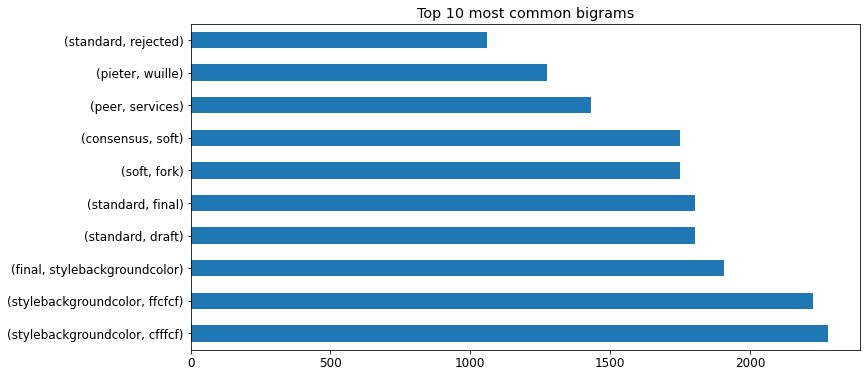

In [152]:
# most common bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(all_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common bigrams');

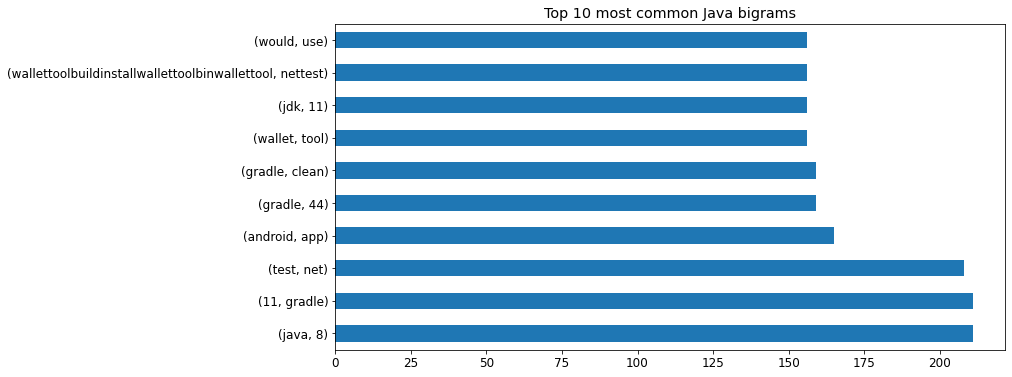

In [153]:
# most common Java bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(java_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Java bigrams');

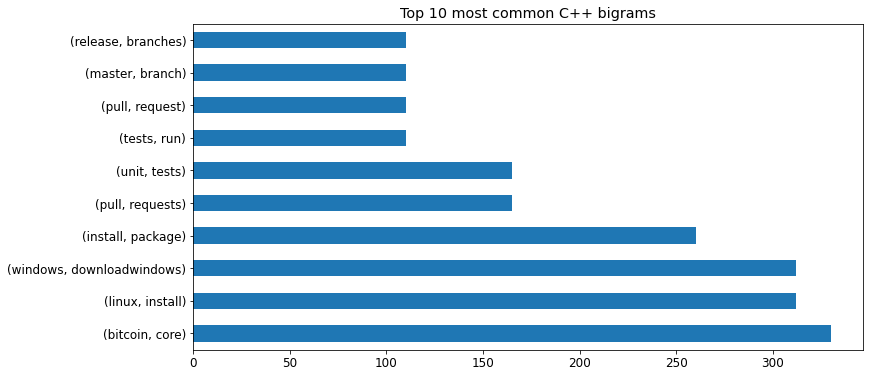

In [154]:
# most common C++ bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(c_plus_plus__words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common C++ bigrams');

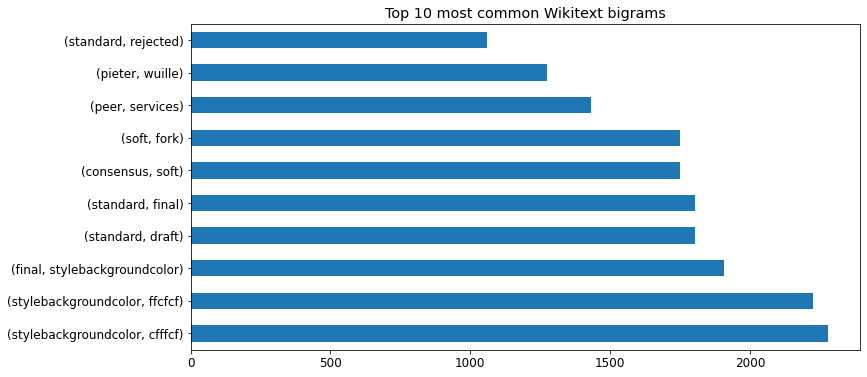

In [155]:
# most common Wikitext bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(wiki_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Wikitext bigrams');

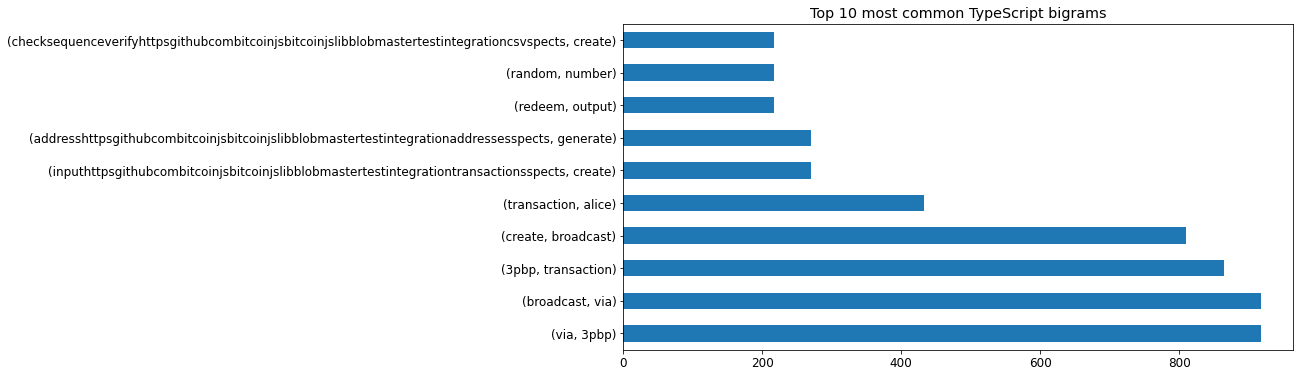

In [156]:
# most common TypeScript bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(type_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common TypeScript bigrams');

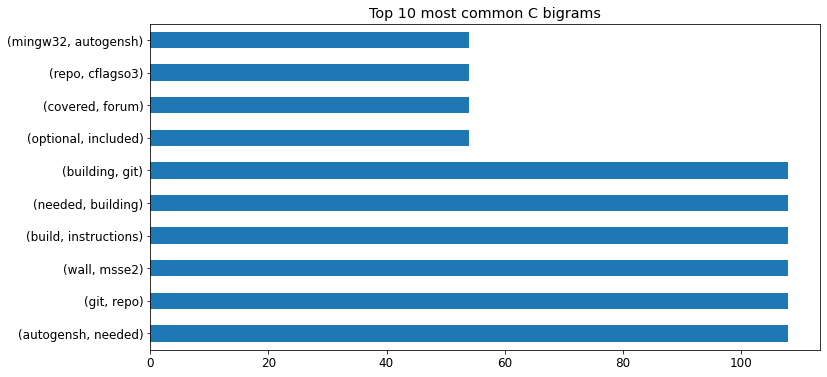

In [157]:
# most common C bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(c_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common C bigrams');

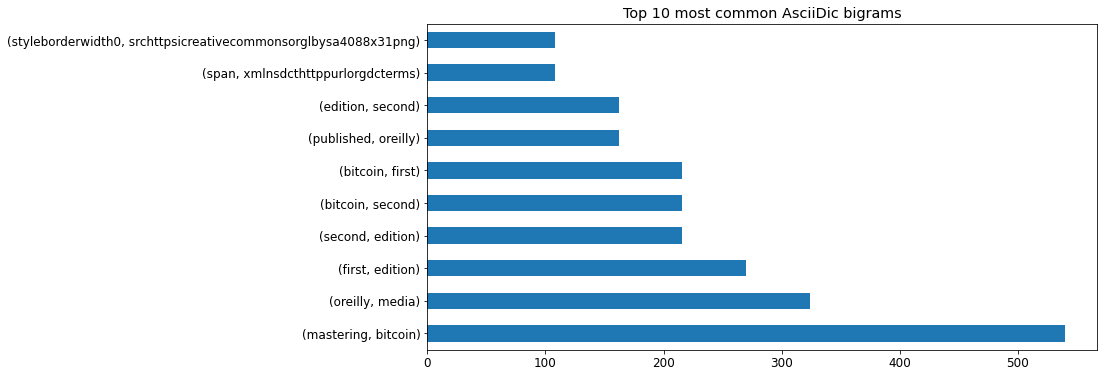

In [158]:
# most common AsciiDoc bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(ascii_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common AsciiDic bigrams');

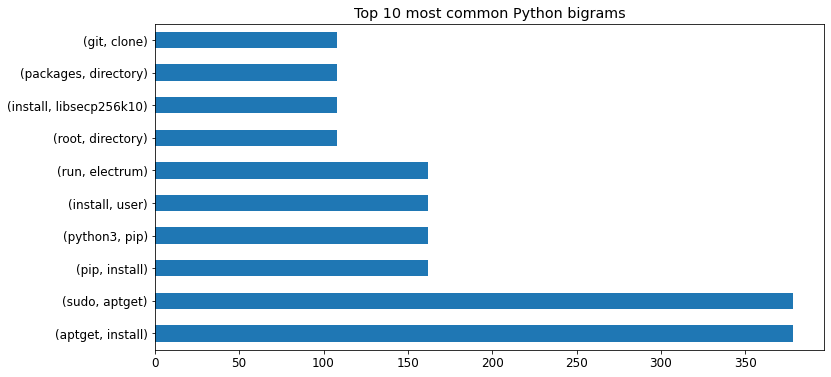

In [159]:
# most common Python bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(python_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Python bigrams');

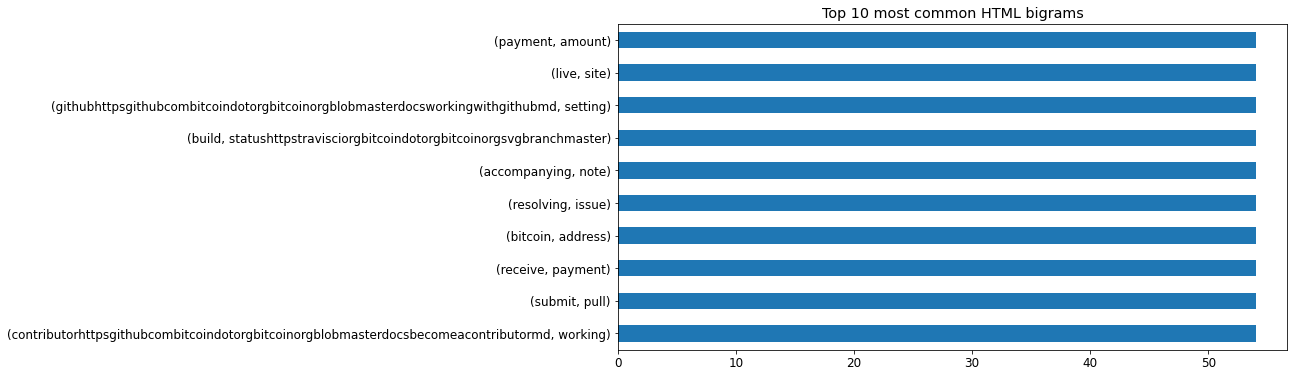

In [160]:
# most common HTML bigrams
plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(html_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common HTML bigrams');

Create a word cloud of the most common words used in all

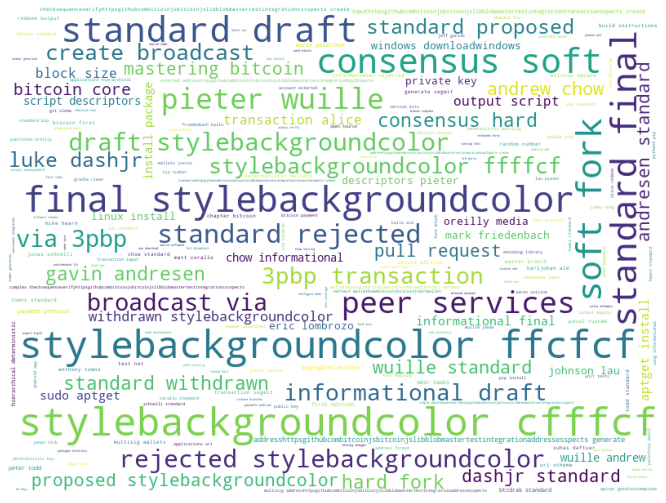

In [161]:
from wordcloud import WordCloud
plt.figure(figsize=(12, 9))
img = WordCloud(background_color='white', width=800, height=600).generate(all_words)
plt.imshow(img)
plt.axis('off');

### Modeling

### TF-IDF

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

In [178]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.readme_contents)
y = df.language

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

In [181]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

In [182]:
tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
train['tree_predicted'] = tree.predict(X_train)
test['tree_predicted'] = tree.predict(X_test)

In [185]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.tree_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.tree_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.tree_predicted))

Accuracy: 79.95%
---
Confusion Matrix
actual          AsciiDoc   C  C++  HTML  Java  Python  TypeScript  Wikitext
tree_predicted                                                             
AsciiDoc              77   0    0     0     0       0          77         0
C                      0  77    0     0     0       0           0         0
C++                    0   0  153     0     0       0           0         0
HTML                   0   0    0    77     0      77           0         0
Java                   0   0    0     0   153       0           0         0
Wikitext               0   0    0     0     0       0           0        77
---
              precision    recall  f1-score   support

    AsciiDoc       0.50      1.00      0.67        77
           C       1.00      1.00      1.00        77
         C++       1.00      1.00      1.00       153
        HTML       0.50      1.00      0.67        77
        Java       1.00      1.00      1.00       153
      Python       0.00  

### Bag of Words

In [202]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_bag_of_words = cv.fit_transform(df.readme_contents)
y = df.language

In [203]:
X_bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [194]:
cv.get_feature_names()

['000',
 '0001',
 '0002',
 '0008',
 '0009',
 '0010',
 '0011',
 '0012',
 '0013',
 '0014',
 '0015',
 '0016',
 '0017',
 '0018',
 '0019',
 '0020',
 '0021',
 '0022',
 '0023',
 '0030',
 '0031',
 '0032',
 '0033',
 '0034',
 '0035',
 '0036',
 '0037',
 '0038',
 '0039',
 '0042',
 '0043',
 '0044',
 '0045',
 '0047',
 '0048',
 '0049',
 '0050',
 '0052',
 '0060',
 '0061',
 '0062',
 '0064',
 '0065',
 '0066',
 '0067',
 '0068',
 '0069',
 '0070',
 '0071',
 '0072',
 '0073',
 '0074',
 '0075',
 '0078',
 '0079',
 '0080',
 '0081',
 '0083',
 '0084',
 '0085',
 '0086',
 '0087',
 '0088',
 '0090',
 '0091',
 '0098',
 '0099',
 '01',
 '0100',
 '0101',
 '0102',
 '0103',
 '0104',
 '0105',
 '0106',
 '0107',
 '0109',
 '0111',
 '0112',
 '0113',
 '0114',
 '0115',
 '0116',
 '0117',
 '0118',
 '0119',
 '0120',
 '0121',
 '0122',
 '0123',
 '0124',
 '0125',
 '0126',
 '0127',
 '0129',
 '0130',
 '0131',
 '0132',
 '0133',
 '0134',
 '0135',
 '0136',
 '0137',
 '0140',
 '0141',
 '0142',
 '0143',
 '0144',
 '0145',
 '0146',
 '0147',
 '01

In [195]:
# Shows the column location of each word
cv.vocabulary_

{'bitcoin': 518,
 'core': 741,
 'integration': 1163,
 'staging': 1858,
 'tree': 2002,
 'https': 1107,
 'bitcoincore': 521,
 'org': 1479,
 'for': 990,
 'an': 404,
 'immediately': 1121,
 'usable': 2048,
 'binary': 503,
 'version': 2077,
 'of': 1446,
 'the': 1948,
 'software': 1832,
 'see': 1775,
 'en': 895,
 'download': 858,
 'further': 1018,
 'information': 1145,
 'about': 346,
 'is': 1177,
 'available': 464,
 'in': 1130,
 'doc': 846,
 'folder': 984,
 'what': 2114,
 'experimental': 937,
 'digital': 835,
 'currency': 776,
 'that': 1947,
 'enables': 896,
 'instant': 1158,
 'payments': 1533,
 'to': 1972,
 'anyone': 419,
 'anywhere': 421,
 'world': 2147,
 'uses': 2056,
 'peer': 1535,
 'technology': 1934,
 'operate': 1468,
 'with': 2136,
 'no': 1423,
 'central': 600,
 'authority': 458,
 'managing': 1317,
 'transactions': 1991,
 'and': 405,
 'issuing': 1181,
 'money': 1381,
 'are': 434,
 'carried': 591,
 'out': 1487,
 'collectively': 670,
 'by': 579,
 'network': 1409,
 'name': 1398,
 'open': 

In [204]:
bow = pd.DataFrame(X_bag_of_words.todense(), columns=cv.get_feature_names())
bow

,000,0001,0002,0008,0009,0010,0011,0012,0013,0014,...,xpubs,year,yml,you,your,yourself,zander,zero,čapek,велеслав
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,7,2,0,0,0,0,0
3,0,1,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,4,13,9,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,7,4,1,0,0,0,0
956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,4,0,0,0,0,0
957,1,0,0,0,0,0,0,0,0,0,...,0,0,0,3,2,0,0,0,0,0
958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,0,0


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X_bag_of_words, y, stratify=y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

In [209]:
tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
train['tree_predicted'] = tree.predict(X_train)
test['tree_predicted'] = tree.predict(X_test)

In [210]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.tree_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.tree_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.tree_predicted))

Accuracy: 79.95%
---
Confusion Matrix
actual          AsciiDoc   C  C++  HTML  Java  Python  TypeScript  Wikitext
tree_predicted                                                             
AsciiDoc              77   0    0     0     0      77           0         0
C                      0  77    0     0     0       0           0         0
C++                    0   0  153     0     0       0           0         0
HTML                   0   0    0    77     0       0           0        77
Java                   0   0    0     0   153       0           0         0
TypeScript             0   0    0     0     0       0          77         0
---
              precision    recall  f1-score   support

    AsciiDoc       0.50      1.00      0.67        77
           C       1.00      1.00      1.00        77
         C++       1.00      1.00      1.00       153
        HTML       0.50      1.00      0.67        77
        Java       1.00      1.00      1.00       153
      Python       0.00  